<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-10" data-toc-modified-id="Problem-10-1">Problem 10</a></span><ul class="toc-item"><li><span><a href="#10a" data-toc-modified-id="10a-1.1">10a</a></span></li><li><span><a href="#9b" data-toc-modified-id="9b-1.2">9b</a></span></li><li><span><a href="#9c" data-toc-modified-id="9c-1.3">9c</a></span></li><li><span><a href="#9d" data-toc-modified-id="9d-1.4">9d</a></span></li><li><span><a href="#9e-h" data-toc-modified-id="9e-h-1.5">9e-h</a></span></li></ul></li><li><span><a href="#Problem-11" data-toc-modified-id="Problem-11-2">Problem 11</a></span><ul class="toc-item"><li><span><a href="#11a" data-toc-modified-id="11a-2.1">11a</a></span></li><li><span><a href="#11c" data-toc-modified-id="11c-2.2">11c</a></span></li><li><span><a href="#11d-g" data-toc-modified-id="11d-g-2.3">11d-g</a></span></li></ul></li></ul></div>

In [78]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, accuracy_score, precision_score, recall_score, classification_report, precision_recall_curve, mean_squared_error, r2_score
import math

## Problem 10

In [2]:
weekly = pd.read_csv('Weekly.csv')

In [3]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### 10a

First, we produce output from R's `summary()` and a graphical correlation matrix.

In [4]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


<IPython.core.display.Javascript object>


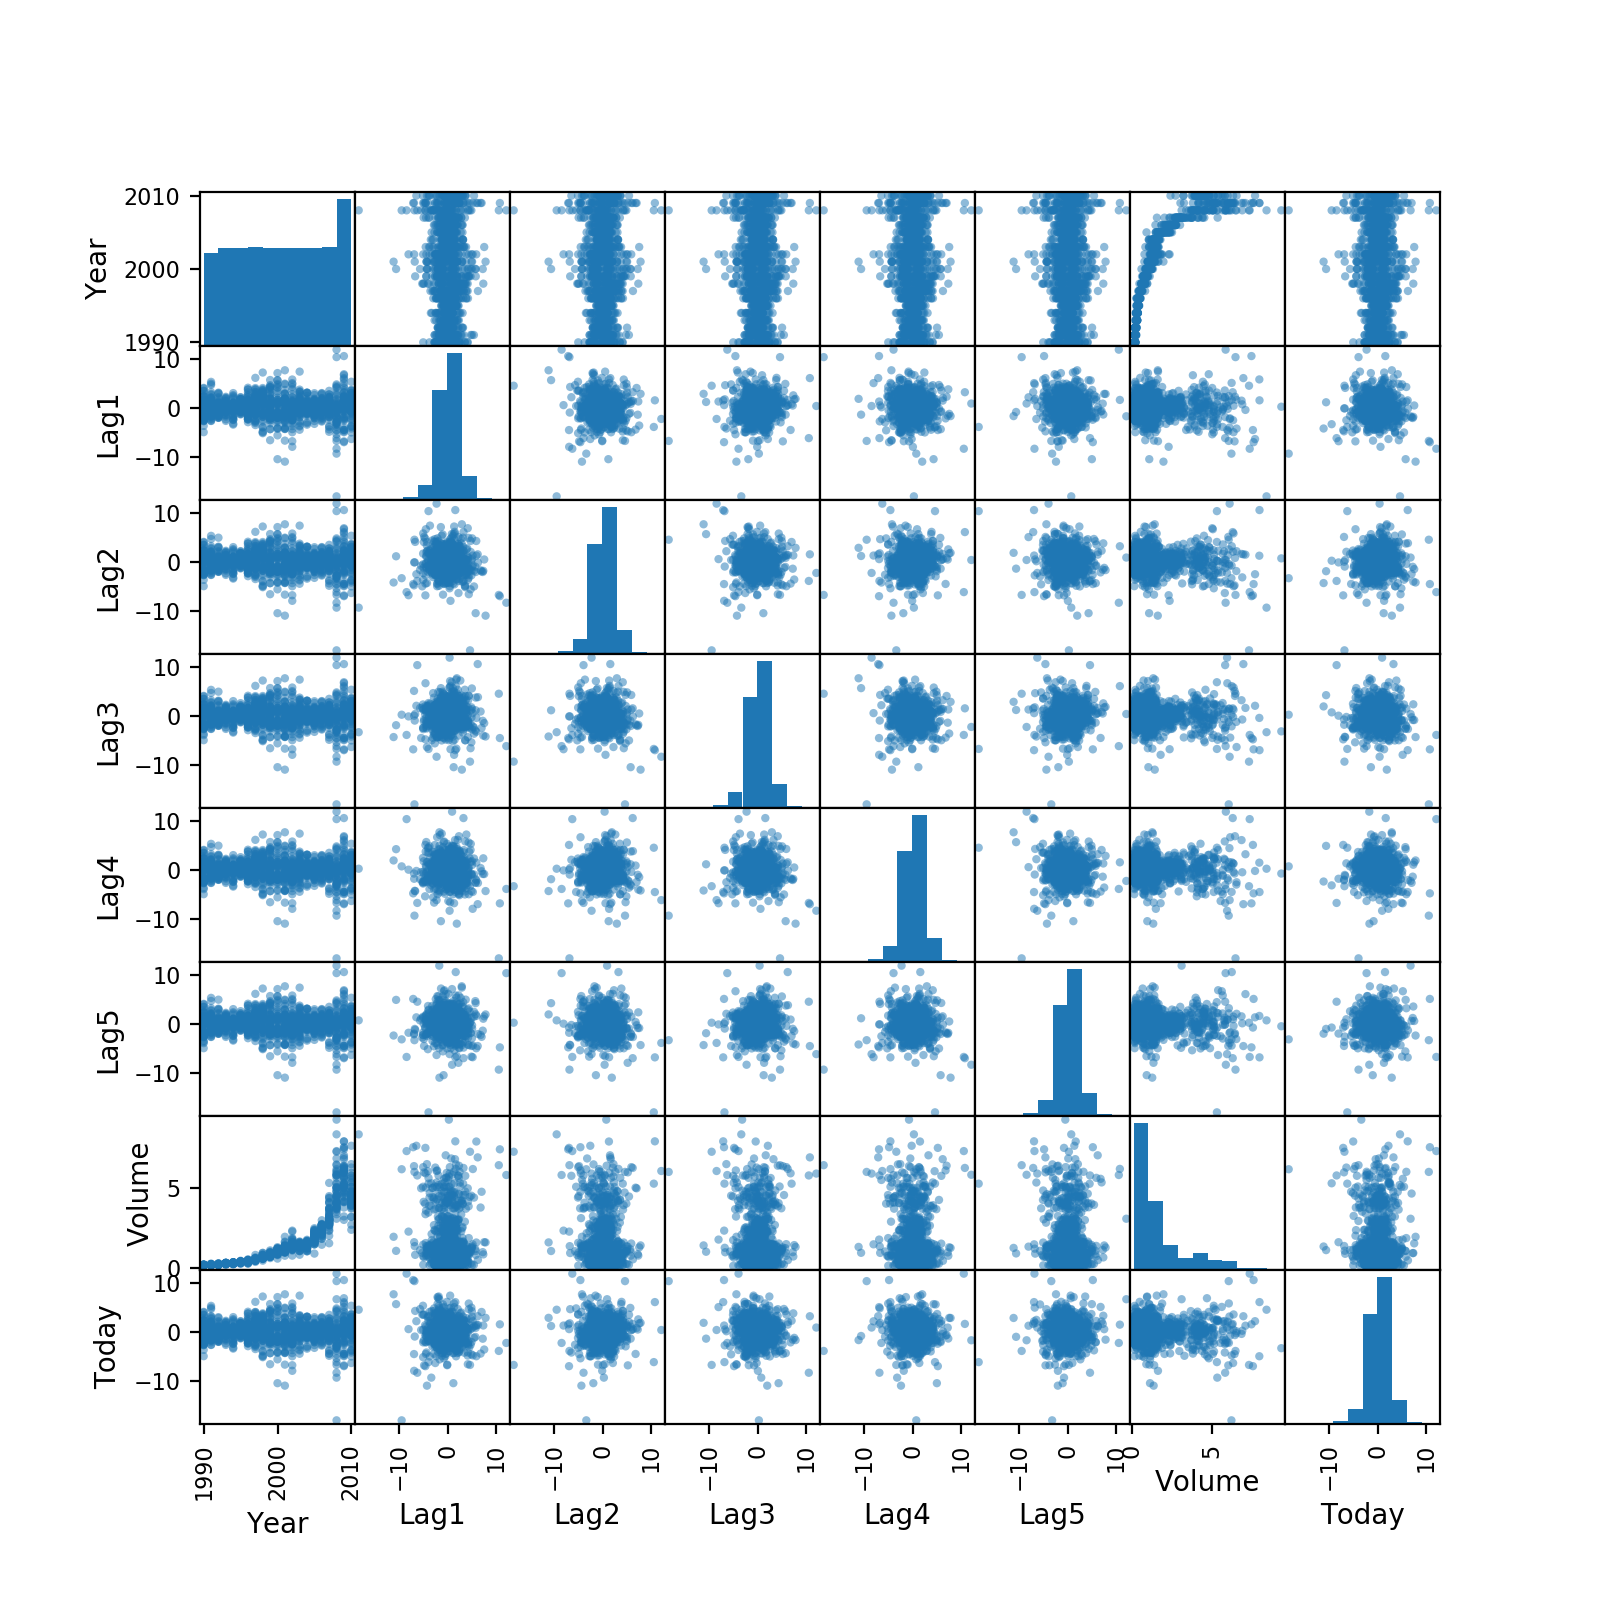

In [5]:
# weekly_clean = weekly
# weekly_clean.iloc[:, -1] = weekly_clean.iloc[:, -1].astype('category').cat.codes
# # Down = 0, Up = 1 
# fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize = (8, 8))
# fig.subplots_adjust(hspace = .5)

# for col, facets in enumerate(axes):
#     for row, facet in enumerate(facets):
#         facet.scatter(weekly_clean.iloc[:, row], weekly_clean.iloc[:, col], s = 4)
    
#         facet.xaxis.set_visible(False)
#         facet.yaxis.set_visible(False)
pd.plotting.scatter_matrix(weekly, figsize = (8, 8))
plt.show()

### 9b

In [6]:
from sklearn.linear_model import LogisticRegression
X_colnames = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X = weekly[X_colnames].values
y = weekly.Direction.values
logreg = LogisticRegression().fit(X, y)

/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Output from R's `summary()`:

```
Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4
```

Like for multiple linear regression, the standard error can be derived from the diagonal of the variance-covariance matrix of these coefficients. However, the variance-covariance matrix itself differs:

\begin{align}
\text{Var}(\hat{\beta}) &= \left(\textbf{X}^T\textbf{V}\textbf{X}\right)^{-1}
\end{align}

where $\textbf{V}$, the estimated variance, is a _N x N_ matrix with diagonals equal to $\hat{pi}_i(1 - \hat{pi}_i)$.

In [11]:
print(logreg.intercept_)
print(logreg.coef_)

[0.26484745]
[[-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]]


The coefficients are slightly different, indicating that scikit-learn is likely not using Fisher scoring - perhaps Newton or gradient descent.

In [8]:
from scipy.stats import norm, t
V = np.diagflat(np.product(logreg.predict_proba(X), axis = 1))
X_design = np.hstack([np.ones((len(X), 1)), X])
betahat_covmat = np.matrix(np.matmul(np.matmul(X_design.T, V), X_design)).I
betahat_se = np.sqrt(betahat_covmat.diagonal())
summary = pd.DataFrame({'coef': np.append(logreg.intercept_, logreg.coef_),
                        'se': np.asarray(betahat_se)[0]})
summary['z'] = summary.coef / summary.se
summary['p-value'] = 2 * (1 - norm.cdf(abs(summary.z)))
summary.index = np.append('(intercept)', X_colnames)

In [9]:
summary

,coef,se,z,p-value
(intercept),0.264847,0.085921,3.082448,0.002053
Lag1,-0.041173,0.026408,-1.559096,0.118974
Lag2,0.058470,0.026863,2.176557,0.029514
Lag3,-0.015991,0.026661,-0.599804,0.548637
Lag4,-0.027700,0.026461,-1.046814,0.295186
Lag5,-0.014403,0.026383,-0.545912,0.585127
Volume,-0.022128,0.036897,-0.599728,0.548688


Strangely, even though the coefficients are different, the standard error is the same. Lag2 is a significant predictor.

### 9c

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
# dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# y_majority_predicted = dummy_majority.predict(X_test)
print(confusion_matrix(y, logreg.predict(X)).T)
accuracy_score(y, logreg.predict(X))

[[ 55  47]
 [429 558]]


0.5629017447199265

Most of the errors come from false positives, though the distribution of positive and negative calls is proportional to the positive and negative errors, and neither class is overrepresented. In fact, it barely outperforms the dummy classifier:

In [25]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent').fit(X, y)
print(confusion_matrix(y, dummy.predict(X)).T)
accuracy_score(y, dummy.predict(X))

[[  0   0]
 [484 605]]


0.5555555555555556

### 9d

In [32]:
X_train = weekly.loc[weekly['Year'].isin(range(1990, 2009)), 'Lag2'].values.reshape(-1, 1)
y_train = weekly.loc[weekly['Year'].isin(range(1990, 2009)), 'Direction'].values
X_test = weekly.loc[weekly['Year'].isin(range(2009, 2011)), 'Lag2'].values.reshape(-1, 1)
y_test = weekly.loc[weekly['Year'].isin(range(2009, 2011)), 'Direction'].values
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_preds = lr.predict(X_test)
print(confusion_matrix(y_test, y_preds).T)
print(accuracy_score(y_test, y_preds))

[[ 9  5]
 [34 56]]
0.625


### 9e-h

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_preds = lda.predict(X_test)
print("LDA:")
print(confusion_matrix(y_test, y_preds).T)
print(accuracy_score(y_test, y_preds))
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_preds = qda.predict(X_test)
print("QDA:")
print(confusion_matrix(y_test, y_preds).T)
print(accuracy_score(y_test, y_preds))
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_preds = knn.predict(X_test)
print("KNN:")
print(confusion_matrix(y_test, y_preds).T)
print(accuracy_score(y_test, y_preds))

LDA:
[[ 9  5]
 [34 56]]
0.625
QDA:
[[ 0  0]
 [43 61]]
0.5865384615384616
KNN:
[[21 31]
 [22 30]]
0.49038461538461536


Logistic regression and LDA do equally well.

## Problem 11

In [87]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [102]:
auto = pd.read_csv('auto.csv')
auto.loc[:, ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']] = auto.loc[:, ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].apply(pd.to_numeric, errors='coerce')
auto = auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### 11a

In [106]:
df = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
df['mpg01'] = auto['mpg'].apply(lambda x: 1 if x > np.median(auto['mpg']) else 0)

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


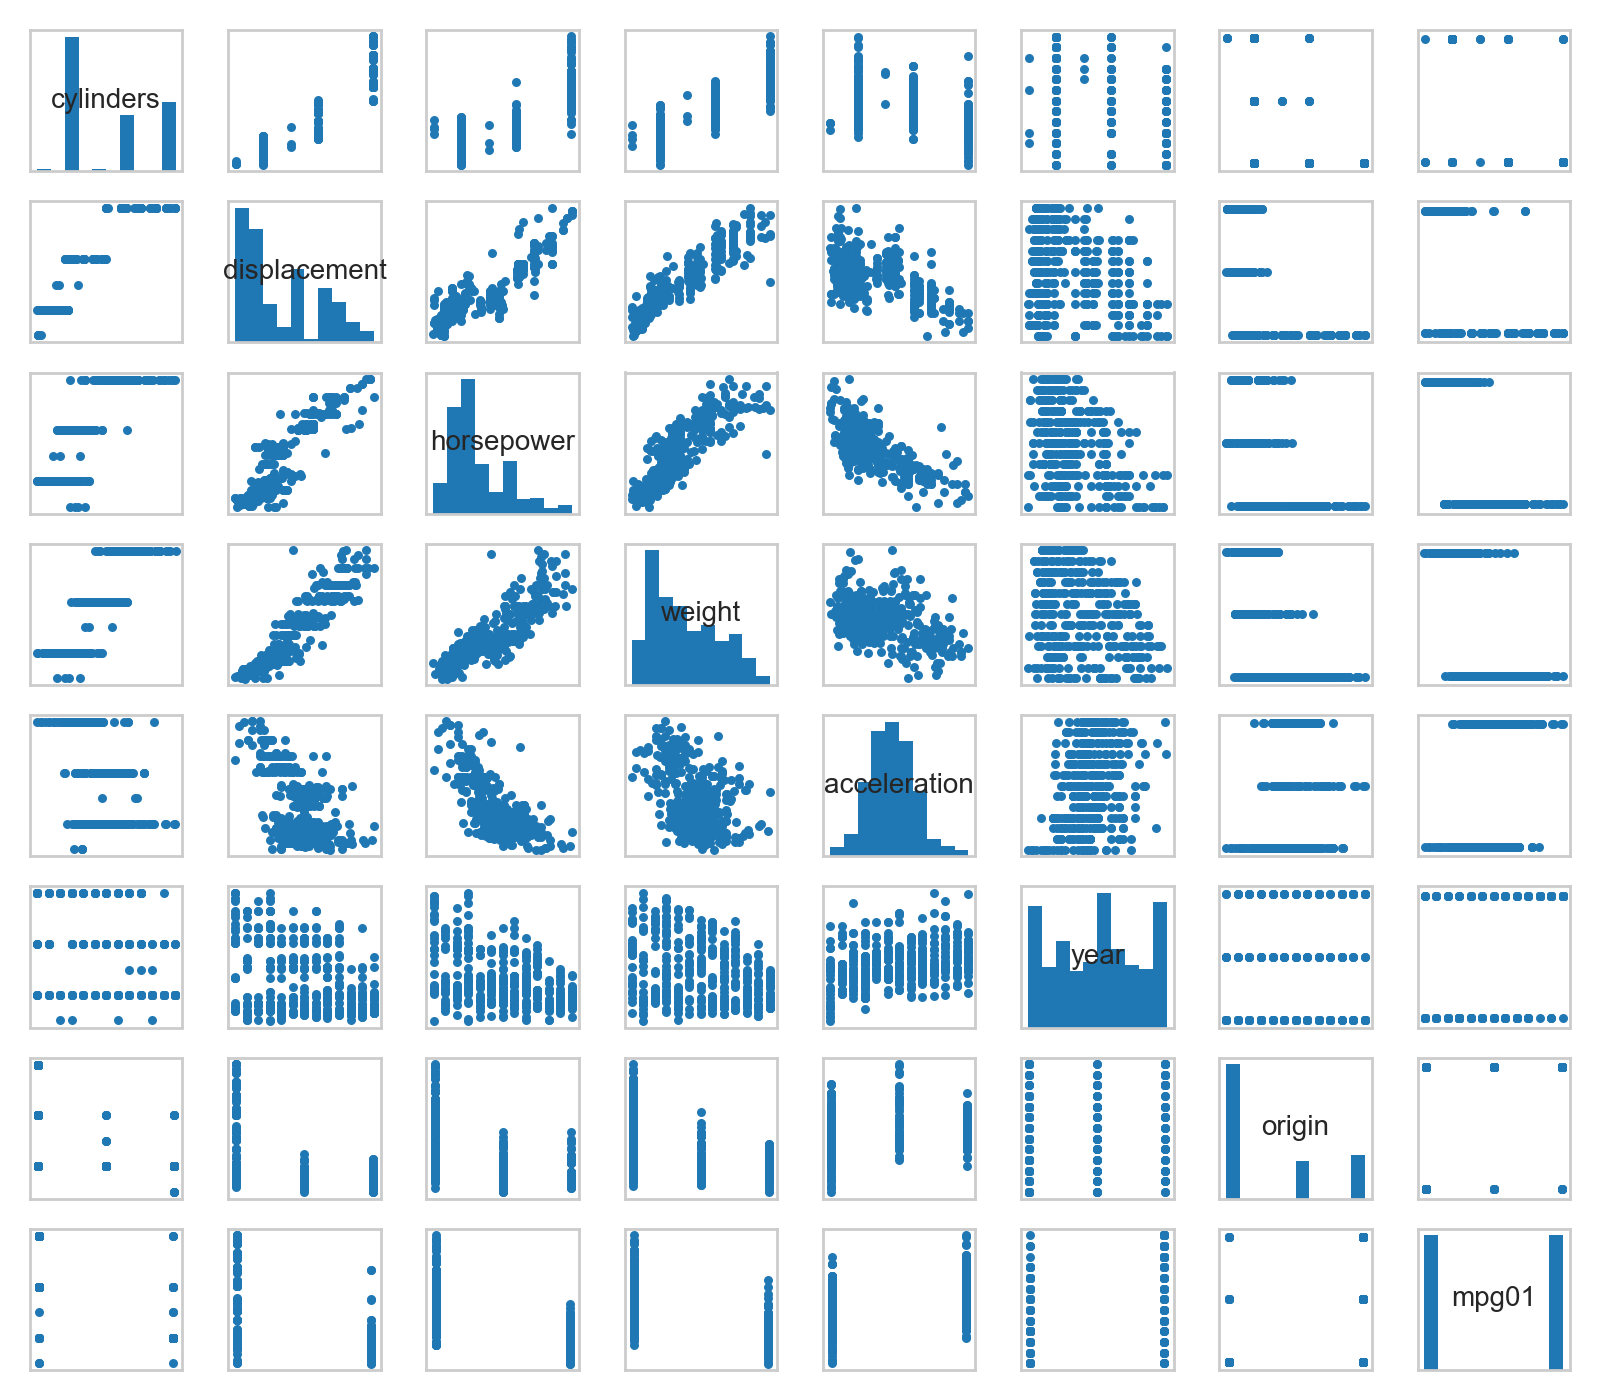

In [107]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize = (8, 7))
fig.subplots_adjust(hspace = .5)
for col, facets in enumerate(axes):
    for row, facet in enumerate(facets):
        if row == col:
            facet.annotate(df.columns[row], (0.5, 0.5), ha = 'center', va = 'center', xycoords = 'axes fraction')
            facet.hist(df.iloc[:, row])
        else:
            facet.scatter(df.iloc[:, col], df.iloc[:, row], s = 5)
        facet.xaxis.set_visible(False)
        facet.yaxis.set_visible(False)
fig.tight_layout()
fig.show()

<IPython.core.display.Javascript object>


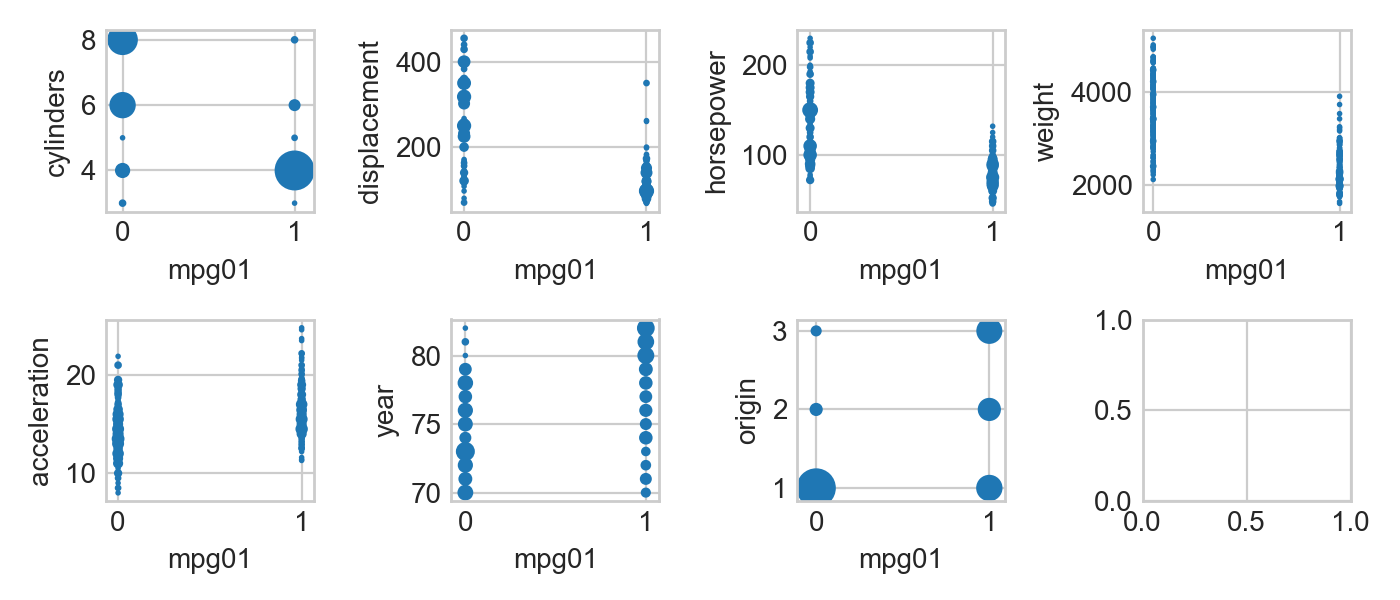

In [203]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (7, 3))

for i, col in enumerate(df.columns[:-1]):
    df2 = df.loc[:, ['mpg01', col]].groupby(['mpg01', col]).apply(lambda x: len(x)).reset_index()
    axes[int(i/4)][i%4].scatter(df2['mpg01'].values, df2[col].values, s=df2[0].values)
    axes[int(i/4)][i%4].set_ylabel(col)
    axes[int(i/4)][i%4].set_xlabel('mpg01')
fig.tight_layout()
fig.show()

### 11c

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values,
                                                    df['mpg01'].values)

### 11d-g

In [218]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
print('LDA:')
print('MSE: {}'.format(mean_squared_error(y_test, lda.predict(X_test))))
print('R2: {}'.format(r2_score(y_test, lda.predict(X_test))))

qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
print('\nQDA:')
print('MSE: {}'.format(mean_squared_error(y_test, qda.predict(X_test))))
print('R2: {}'.format(r2_score(y_test, qda.predict(X_test))))

logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('\nLogistic Regression:')
print('MSE: {}'.format(mean_squared_error(y_test, logreg.predict(X_test))))
print('R2: {}'.format(r2_score(y_test, logreg.predict(X_test))))

for n in [1, 3, 5, 7, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    print('\n{}-NN:'.format(n))
    print('MSE: {}'.format(mean_squared_error(y_test, knn.predict(X_test))))
    print('R2: {}'.format(r2_score(y_test, knn.predict(X_test))))

LDA:
MSE: 0.09183673469387756
R2: 0.6325000000000001

QDA:
MSE: 0.09183673469387756
R2: 0.6325000000000001

Logistic Regression:
MSE: 0.09183673469387756
R2: 0.6325000000000001

1-NN:
MSE: 0.1326530612244898
R2: 0.46916666666666673

3-NN:
MSE: 0.12244897959183673
R2: 0.51

5-NN:
MSE: 0.1326530612244898
R2: 0.46916666666666673

7-NN:
MSE: 0.10204081632653061
R2: 0.5916666666666668

10-NN:
MSE: 0.14285714285714285
R2: 0.42833333333333334

20-NN:
MSE: 0.12244897959183673
R2: 0.51
